<a href="https://colab.research.google.com/github/pooya-mohammadi/easy_image_editing/blob/main/easy_image_editing_grounding_dino_glide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Easy Image Editing
Generative AI based image editing/inpainting made super easy to work with.

# Installation

In [1]:
!pip install requests
!pip install Pillow
!pip install numpy
!pip install deep_utils==1.2.1
!pip install git+https://github.com/IDEA-Research/GroundingDINO
!pip install git+https://github.com/openai/glide-text2im

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.0/533.0 kB 33.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/IDEA-Research/GroundingDINO to /tmp/pip-req-build-dr40xvem
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO /tmp/pip-req-build-dr40xvem
  Resolved https://github.com/IDEA-Research/GroundingDINO to commit 31aa788a3cf6ab82d27385f39e242b34af9cc011
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB

### Download the image

In [2]:
from deep_utils import DownloadUtils

image_download_path = "https://github.com/pooya-mohammadi/deep_utils/releases/download/1.0.2/golsa_in_garden.jpg"
DownloadUtils.download_file(image_download_path, exists_skip=True)

Downloading: [██████████████████████████████████████████████████]


'./golsa_in_garden.jpg'

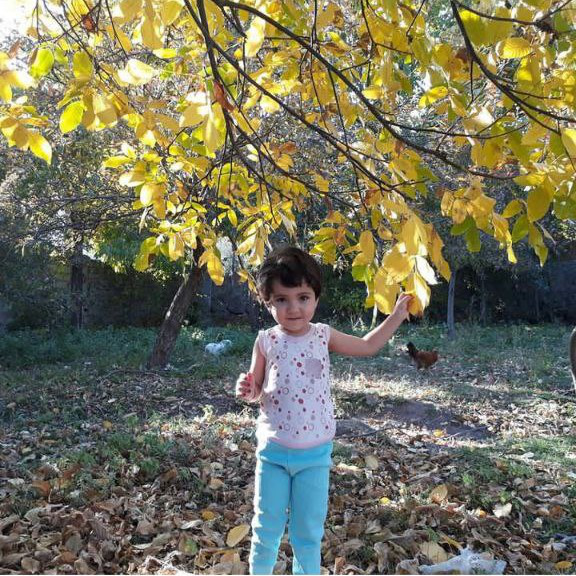

In [3]:
### Visualize Image
from PIL import Image
# You can upload your image on colab and simply change the name of the following variable!
image_path = "golsa_in_garden.jpg"

pil_img = Image.open(image_path)
pil_img

# Object Selection

In [4]:
# Load model
from deep_utils import Text2BoxVisualGroundingDino

model = Text2BoxVisualGroundingDino()

Downloading: [██████████████████████████████████████████████████]


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[INFO] Groundingdino Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:866: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


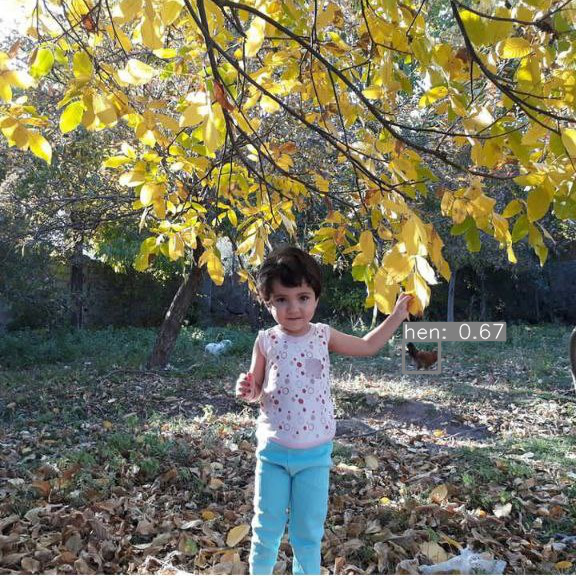

In [5]:
import numpy as np
# Add the description of object you want to replace
text = "Hen"
img = np.asarray(pil_img)
output = model.text_to_box(text, img)
annotate_img = model.annotate(img, output)
pil_annotate_img = Image.fromarray(annotate_img)
pil_annotate_img

## In Painting with GLIDE

In [6]:
from deep_utils import ImageEditingGLIDE
editing_model = ImageEditingGLIDE()

  0%|          | 0.00/1.54G [00:00<?, ?iB/s]

total base parameters 385037638


  0%|          | 0.00/1.59G [00:00<?, ?iB/s]

total upsampler parameters 398368198


In [7]:
# Only the first box is processed. Processing other boxes will be added in the near future!
box = output.boxes[0] 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

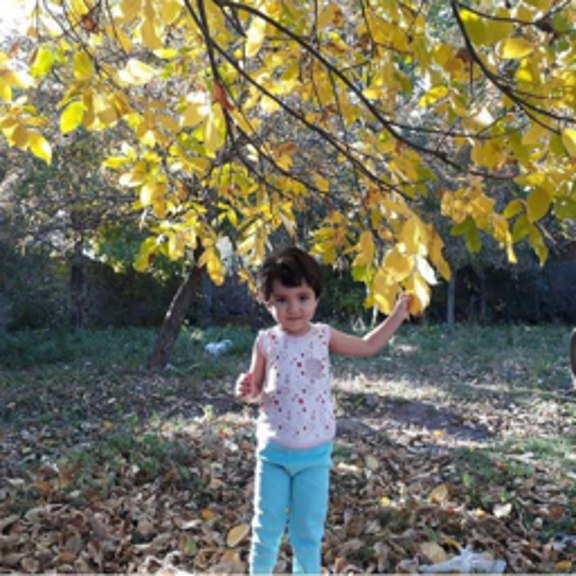

In [8]:
# Add the description you want to replace previous object with
edit_text = "dead gray leaves"
edited_image = editing_model.edit_box(img=pil_img, text=edit_text, box=box)
edited_image = edited_image.resize(pil_img.size)
edited_image.save("glide_output.jpg")
edited_image

## Note:
The resolution is degraded! Working on it!

*_:)_*